In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.6 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 1.2 MB 41.0 MB/s 
     |████████████████████████████████| 189 kB 50.4 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 51 kB 307 kB/s 
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.vision.all import *
from fastai.data.all import *
from fastai.imports import *
from fastai.vision.core import *
from fastai import metrics

In [ ]:
import torch 
torch.cuda.get_device_properties(0).total_memory

11996954624

In [ ]:
path=Path("/content/drive/MyDrive/DATA_HAR")

# **DATA BLOCK AND LOADER**

In [ ]:
def get_tuple_files(path):
    files = get_image_files(path)
    files = files.filter(lambda f: f.name.endswith('vhr.tif'),negate=False)
    return files


In [ ]:
def label_func(x):
      return str(x.parents[0]/x.stem[0:23])+"_mask_build.tif";

In [ ]:
 seg = DataBlock(blocks=(ImageBlock(), MaskBlock( codes =['n','y'])),
                
    item_tfms=[Resize(512,method='squish',resamples=(Image.BICUBIC,Image.BICUBIC)),ToTensor],
    batch_tfms=[IntToFloatTensor(),Normalize.from_stats(*imagenet_stats)],
    
    get_items=get_tuple_files,            
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=label_func)
    

In [ ]:
seg.summary(path)

In [ ]:
dls = seg.dataloaders(path,bs=8)
dls.show_batch()

In [ ]:
b = dls.one_batch()

In [ ]:
plt.imshow(b[0][0][2].cpu().numpy())

In [ ]:
plt.imshow(b[1][0].cpu().numpy())

# **MODEL SUMMARY**

In [ ]:
learn= unet_learner(dls,resnet34, metrics=[Dice()])

learn.summary()

In [ ]:
learn.fine_tune(3,base_lr=2e-3)

epoch,train_loss,valid_loss,dice,time


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,dice,time
0,0.386249,0.352359,0.296226,35:15


epoch,train_loss,valid_loss,dice,time
0,0.221990,0.226471,0.740469,37:14
1,0.159955,0.154978,0.816410,37:25
2,0.147683,0.139824,0.837201,37:09


In [ ]:
learn.save("/content/drive/My Drive/patch-build")

Path('/content/drive/My Drive/patch-build.pth')

In [ ]:
learn.export("/content/drive/My Drive/patch-building.pkl")

# **TESTING**

In [ ]:
im=PILImage.create("/content/drive/My Drive/DATA_HAR/E249800N3305400UTM15R_1_vhr.tif")

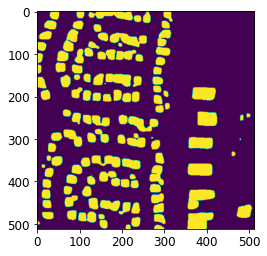

In [ ]:
plt.imshow(learn.predict(im)[0])

In [ ]:
learn.load("/content/drive/My Drive/patch-build")